## The Sparks Foundation - Data Science & Business Analytics internship

## Linear Regression with Python Scikit Learn

## Task 1 : Prediction using Supervised ML

# Author : Sahil Shettigar

## Importing Library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
%matplotlib inline
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LinearRegression

## Reading csv file

In [3]:
df = pd.read_csv('D:/The sparks foundation internship/student.csv')
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [6]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## Plotting Graph

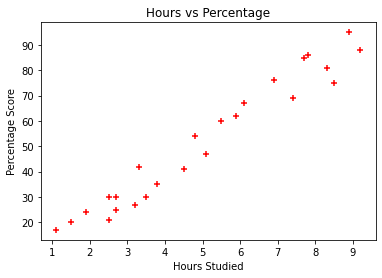

In [30]:
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score') 
plt.scatter(df.Hours,df.Scores,color='red',marker='+')

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**


<AxesSubplot:xlabel='Hours'>

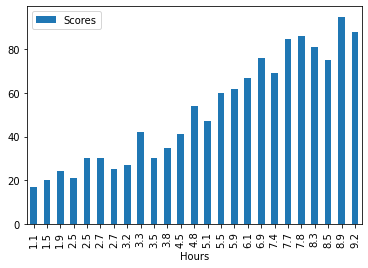

In [52]:
df.sort_values(["Hours"],axis=0,ascending=[True],inplace=True)
df.plot.bar(x='Hours',y='Scores')

## **Preparing the data**

In [35]:
X = df.iloc[:, :-1].values 
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [36]:
y = df.iloc[:, 1].values  
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

## **Training the Algorithm**
We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [16]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 
print("Training completed.")

Training completed.


## Simple way to calculate percentage score of 9.25 hours studied

In [24]:
regressor.coef_ 

array([9.91065648])

In [25]:
regressor.intercept_

2.0181600414346974

In [26]:
regressor.predict(np.array(9.25).reshape(1, 1))

array([93.69173249])

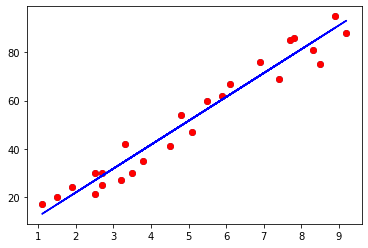

In [30]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line,color='blue');
plt.scatter(df.Hours,df.Scores,color='red',marker='o')

## **Making Predictions**
Now that we have trained our algorithm, it's time to make some predictions.

In [24]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [25]:
# Comparing Actual vs Predicted
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df1 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


## After predicting the data we are now again calculating the percentage score of value 9.25 hours studied

In [26]:
# You can also test with your own data
hours = np.array(9.25).reshape(1, 1)
own_pred = regressor.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 93.69173248737535


## Evaluating the model

In [27]:
from sklearn import metrics
print ("Mean absolute error:",metrics.mean_absolute_error(y_test,y_pred))

Mean absolute error: 4.183859899002975
